# PIMA Indian Diabetes Prediction

In an article from Diabetes.co.uk it is claimed that obesity is believed to account for 80% of the risk of developing diabetes, and some research suggests that obese people are up to eighty times more likely to develop diabetes type 2 than others with BMI of less than 22*.

BMI will therefore be the dependent value for this exercise.

*https://www.diabetes.co.uk/diabetes-and-obesity.html

In [647]:
#Import libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [648]:
#Import dataset

# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

dataset = pd.read_csv('diabetes.csv')

# Profiling

The dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. All patients are female at least 21 years old and of Indian heritage.

To get a clear picture of the dataset let's use pandas_profiling. However, you'll find the output.hmtl file in the repository. There is no need for you to run the following commands.

In anaconda prompt: conda install -c anaconda pandas-profiling

Import package: import pandas_profiling

In [649]:
#from pandas_profiling import ProfileReport
#file = ProfileReport(dataset)
#file.to_file(output_file='output.html')

### From the profile report we can draw some conslusions.


The dataset has nine columns. Eight numerical and one categorical, or boolean. One could run some models to see if we can achieve a high accuracy in predicting diabetes outcome,the boolean value "outcome", as the dependent variable. But, since this is an exercise in regression, our dependable value will be a numerical value from one of the other columns. 

In the profilereport there are a number of warnings we need to address. First, there are some correlation alerts that aren't important to us, for now, but there is a high number of zeros. For example, in the insulin column there are 374 zeros. That is a high number for a dataset with  768 observations. 

A zero value for glucose, blood pressure, skin thickness, insulin and bmi is physically impossible. One way to handle this problem is to drop the rows entirely, but then a large portion of the data would be lost. Another way of handling this issue is by replacing the zero values with a median.

But first let's take a closer look if people with diabetes have a higher BMI than people with no outcome.

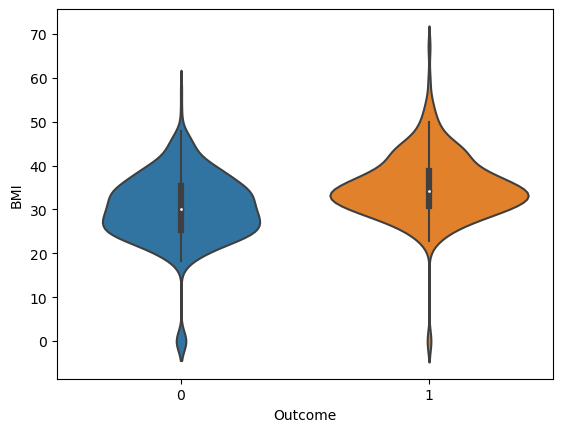

In [650]:
ax = sns.violinplot(x='Outcome', y='BMI', data=dataset)

We can clearly see a large portion of people with diabetes have a BMI over 30. The difference between the groups might be large enough to get some decent predictions. However, the dataset might be too small for this task and there might be variables missing that would give a better representation of reality.

### Checking for duplicate data

In [651]:
print(dataset.duplicated().sum())

0


# Data preprocessing

### Replacing zero values with median

Since outcome is going to be used, as well as other variables, to predict BMI the median isn't calculated on the whole dataset. Instead the dataset is split into two groups: outcome 1 and outcome 0. Then the median is calculated for each and lastly the dataset is combined again.

In [652]:
def calc_median(_column, _dataset):
    dataset = _dataset
    column = _column
    
    #Split dataset
    outcome_zero = dataset.loc[dataset["Outcome"] == 0]
    outcome_one = dataset.loc[dataset["Outcome"] == 1]
    
    #Calc median
    outcome_zero = outcome_zero.replace({column:0}, np.median(outcome_zero[column]))
    outcome_one = outcome_one.replace({column:0}, np.median(outcome_one[column]))
    
    #Combine
    df = [outcome_zero, outcome_one]
    dataset = pd.concat(df)
    return dataset
    
#Calc median for each column with zero values.
dataset = calc_median("BMI", dataset)
dataset = calc_median("Glucose", dataset)
dataset = calc_median("BloodPressure", dataset)
dataset = calc_median("SkinThickness", dataset)
dataset = calc_median("Insulin", dataset)

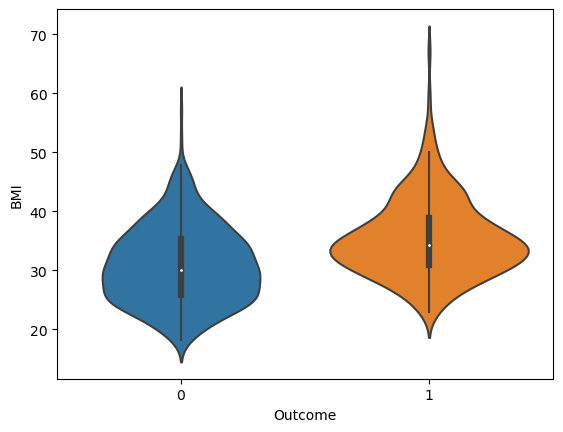

In [653]:
ax = sns.violinplot(x='Outcome', y='BMI', data=dataset)

We can clearly see that ther are no longer any zero values in BMI.

## Splitting the dataset into training and test data

In [654]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [655]:
X = dataset.drop(["BMI"], axis=1)
y = dataset["BMI"]

On the heatmap, and under correlations, in the profiling report it is obvious that pregnancies have nothing to do with BMI.
Let's drop that column.

In [656]:
X = X.drop(["Pregnancies"], axis=1)

In [657]:
X = X.values
y = y.values

In [658]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Scaling

In [659]:
#Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model fitting

In [660]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Multiple Linear Regression

### Training the Multiple Linear Regression model on the Training set

In [661]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [662]:
lr_pred = lr.predict(X_test)

### Visualising the test results

In [663]:
np.set_printoptions(precision=0)
print(np.concatenate((lr_pred.reshape(len(lr_pred),1), y_test.reshape(len(y_test),1)),1))

[[31. 32.]
 [38. 34.]
 [38. 40.]
 [32. 33.]
 [29. 25.]
 [33. 30.]
 [33. 33.]
 [34. 32.]
 [30. 30.]
 [34. 44.]
 [34. 43.]
 [31. 33.]
 [25. 28.]
 [40. 35.]
 [35. 33.]
 [30. 38.]
 [43. 43.]
 [32. 37.]
 [35. 31.]
 [32. 31.]
 [30. 38.]
 [34. 27.]
 [33. 28.]
 [29. 28.]
 [35. 35.]
 [28. 35.]
 [31. 27.]
 [30. 27.]
 [29. 23.]
 [29. 28.]
 [33. 36.]
 [30. 29.]
 [44. 38.]
 [34. 32.]
 [36. 40.]
 [26. 29.]
 [41. 50.]
 [30. 23.]
 [30. 20.]
 [26. 31.]
 [31. 40.]
 [37. 36.]
 [29. 33.]
 [28. 25.]
 [24. 22.]
 [32. 29.]
 [28. 27.]
 [33. 40.]
 [25. 27.]
 [38. 32.]
 [33. 35.]
 [34. 42.]
 [29. 25.]
 [27. 24.]
 [27. 30.]
 [30. 34.]
 [30. 29.]
 [28. 28.]
 [28. 32.]
 [37. 34.]
 [35. 32.]
 [29. 21.]
 [41. 39.]
 [31. 31.]
 [31. 30.]
 [35. 37.]
 [33. 32.]
 [27. 25.]
 [38. 46.]
 [40. 57.]
 [29. 23.]
 [30. 25.]
 [28. 22.]
 [34. 33.]
 [28. 26.]
 [29. 30.]
 [38. 42.]
 [34. 38.]
 [29. 29.]
 [28. 25.]
 [36. 28.]
 [33. 36.]
 [36. 41.]
 [29. 27.]
 [31. 36.]
 [27. 34.]
 [34. 29.]
 [35. 35.]
 [31. 26.]
 [38. 46.]
 [29. 25.]

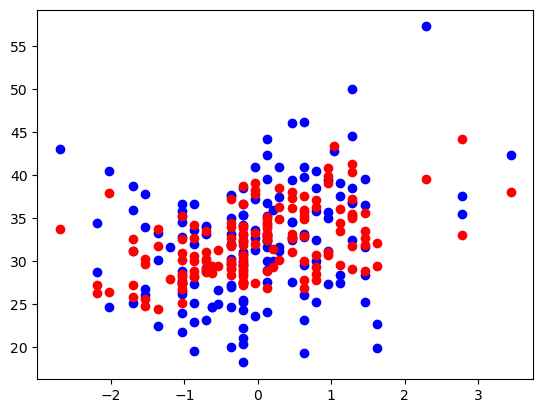

In [664]:
plt.scatter(X_test[:, 1][:, None],y_test, color = "blue")
plt.scatter(X_test[:, 1][:, None],lr_pred, color = "red")

### Accuracy score

In [665]:
mlr_score = r2_score(y_test, lr_pred)
print("The accuracy of Multiple Linear Regression is {}%".format(round(mlr_score, 2) *100))

The accuracy of Multiple Linear Regression is 40.0%


# Support Vector Regression (SVR)

### Training the SVR model on the Training set

#### Set SVR epsilons

In [666]:
svr_0 = SVR(epsilon = 0, kernel = 'linear')
svr_1 = SVR(epsilon = 0.5, kernel = 'linear')
svr_2 = SVR(epsilon = 1.5, kernel = 'linear')

In [667]:
svr_0.fit(X_train, y_train)
svr_1.fit(X_train, y_train)
svr_2.fit(X_train, y_train)

SVR(epsilon=1.5, kernel='linear')

### Predicting the Test set results

In [668]:
svr_pred_0 = svr_0.predict(X_test)
svr_pred_1 = svr_1.predict(X_test)
svr_pred_2 = svr_2.predict(X_test)

### Visualising the test results

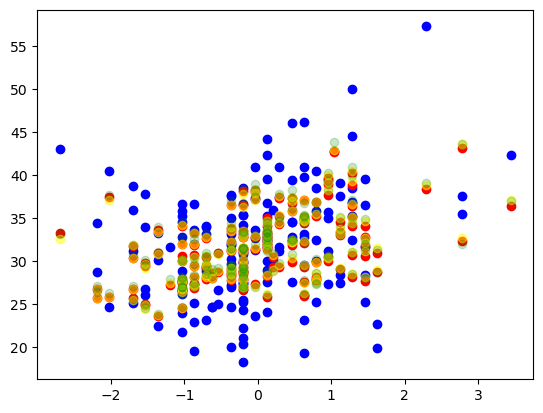

In [669]:
plt.scatter(X_test[:, 1][:, None],y_test, color = "blue")
plt.scatter(X_test[:, 1][:, None],svr_pred_0, color = "red")
plt.scatter(X_test[:, 1][:, None],svr_pred_1, alpha = 0.5, color = "yellow")
plt.scatter(X_test[:, 1][:, None],svr_pred_2, alpha = 0.2 ,color = "green")

### Accuracy score

In [670]:
svr_score_0 = r2_score(y_test, svr_pred_0)
print("The accuracy of SVR, epsilon 0, is {}%".format(round(svr_score_0, 2) *100))

The accuracy of SVR, epsilon 0, is 40.0%


In [671]:
svr_score_1 = r2_score(y_test, svr_pred_1)
print("The accuracy of SVR, epsilon 0.5, is {}%".format(round(svr_score_1, 2) *100))

The accuracy of SVR, epsilon 0.5, is 40.0%


In [672]:
svr_score_2 = r2_score(y_test, svr_pred_2)
print("The accuracy of SVR, epsilon 1.5, is {}%".format(round(svr_score_2, 2) *100))

The accuracy of SVR, epsilon 1.5, is 40.0%


# Decision Tree

### Training the Decision Tree model on the Training set

In [673]:
tree = DecisionTreeRegressor(random_state = 40)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=40)

### Predicting the Test set results

In [674]:
tree_pred = tree.predict(X_test)

### Visualising the test results

In [675]:
np.set_printoptions(precision=0)
print(np.concatenate((tree_pred.reshape(len(tree_pred),1), y_test.reshape(len(y_test),1)),1))

[[25. 32.]
 [39. 34.]
 [36. 40.]
 [34. 33.]
 [32. 25.]
 [30. 30.]
 [30. 33.]
 [39. 32.]
 [21. 30.]
 [44. 44.]
 [24. 43.]
 [25. 33.]
 [22. 28.]
 [30. 35.]
 [47. 33.]
 [36. 38.]
 [53. 43.]
 [24. 37.]
 [38. 31.]
 [36. 31.]
 [35. 38.]
 [32. 27.]
 [34. 28.]
 [27. 28.]
 [45. 35.]
 [22. 35.]
 [26. 27.]
 [30. 27.]
 [29. 23.]
 [19. 28.]
 [31. 36.]
 [28. 29.]
 [46. 38.]
 [43. 32.]
 [47. 40.]
 [30. 29.]
 [42. 50.]
 [42. 23.]
 [26. 20.]
 [31. 31.]
 [28. 40.]
 [47. 36.]
 [26. 33.]
 [31. 25.]
 [20. 22.]
 [30. 29.]
 [34. 27.]
 [42. 40.]
 [22. 27.]
 [48. 32.]
 [25. 35.]
 [28. 42.]
 [29. 25.]
 [25. 24.]
 [26. 30.]
 [30. 34.]
 [34. 29.]
 [32. 28.]
 [34. 32.]
 [39. 34.]
 [34. 32.]
 [34. 21.]
 [42. 39.]
 [23. 31.]
 [21. 30.]
 [39. 37.]
 [37. 32.]
 [31. 25.]
 [42. 46.]
 [33. 57.]
 [34. 23.]
 [34. 25.]
 [26. 22.]
 [39. 33.]
 [23. 26.]
 [30. 30.]
 [49. 42.]
 [36. 38.]
 [22. 29.]
 [30. 25.]
 [36. 28.]
 [29. 36.]
 [36. 41.]
 [27. 27.]
 [26. 36.]
 [24. 34.]
 [32. 29.]
 [24. 35.]
 [26. 26.]
 [35. 46.]
 [31. 25.]

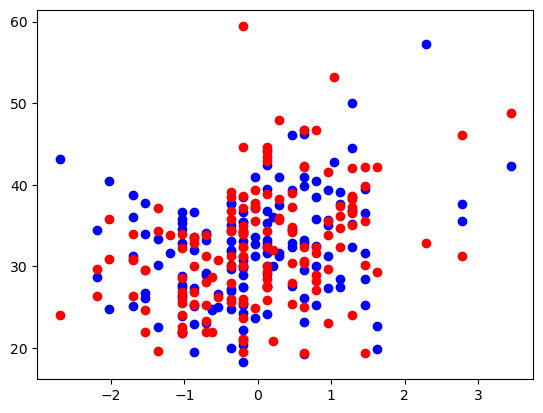

In [676]:
plt.scatter(X_test[:, 1][:, None],y_test, color = "blue")
plt.scatter(X_test[:, 1][:, None],tree_pred, color = "red")

### Accuracy score

In [677]:
tree_score = r2_score(y_test, tree_pred)
print("The accuracy of Decision Tree is {}%".format(round(tree_score, 2) *100))

The accuracy of Decision Tree is -34.0%


# Random Forest Regression

### Training the Decision Tree model on the Training set

In [678]:
forest = RandomForestRegressor(n_estimators = 100, random_state = 40)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=40)

### Predicting the Test set results

In [679]:
forest_pred = forest.predict(X_test)

### Visualising the test results

In [680]:
np.set_printoptions(precision=0)
print(np.concatenate((forest_pred.reshape(len(forest_pred),1), y_test.reshape(len(y_test),1)),1))

[[32. 32.]
 [38. 34.]
 [37. 40.]
 [29. 33.]
 [27. 25.]
 [31. 30.]
 [35. 33.]
 [34. 32.]
 [27. 30.]
 [36. 44.]
 [35. 43.]
 [30. 33.]
 [27. 28.]
 [38. 35.]
 [38. 33.]
 [30. 38.]
 [45. 43.]
 [32. 37.]
 [33. 31.]
 [34. 31.]
 [32. 38.]
 [36. 27.]
 [32. 28.]
 [28. 28.]
 [40. 35.]
 [26. 35.]
 [32. 27.]
 [33. 27.]
 [30. 23.]
 [26. 28.]
 [34. 36.]
 [28. 29.]
 [49. 38.]
 [34. 32.]
 [38. 40.]
 [28. 29.]
 [40. 50.]
 [33. 23.]
 [28. 20.]
 [26. 31.]
 [34. 40.]
 [39. 36.]
 [30. 33.]
 [27. 25.]
 [24. 22.]
 [32. 29.]
 [28. 27.]
 [34. 40.]
 [25. 27.]
 [38. 32.]
 [37. 35.]
 [31. 42.]
 [28. 25.]
 [26. 24.]
 [24. 30.]
 [30. 34.]
 [31. 29.]
 [27. 28.]
 [26. 32.]
 [38. 34.]
 [32. 32.]
 [28. 21.]
 [41. 39.]
 [33. 31.]
 [30. 30.]
 [35. 37.]
 [34. 32.]
 [27. 25.]
 [38. 46.]
 [41. 57.]
 [28. 23.]
 [27. 25.]
 [26. 22.]
 [38. 33.]
 [26. 26.]
 [28. 30.]
 [40. 42.]
 [35. 38.]
 [28. 29.]
 [29. 25.]
 [36. 28.]
 [32. 36.]
 [33. 41.]
 [27. 27.]
 [29. 36.]
 [27. 34.]
 [36. 29.]
 [31. 35.]
 [28. 26.]
 [40. 46.]
 [30. 25.]

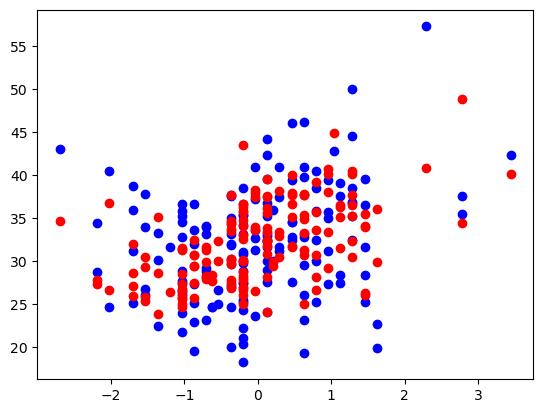

In [681]:
plt.scatter(X_test[:, 1][:, None],y_test, color = "blue")
plt.scatter(X_test[:, 1][:, None],forest_pred, color = "red")

### Accuracy score

In [682]:
forest_score = r2_score(y_test, forest_pred)
print("The accuracy of Decision Tree is {}%".format(round(forest_score, 2) *100))

The accuracy of Decision Tree is 37.0%


# Rerun with the highest correlated variables

Since the correlation between BMI and other variables is fairly low, let's rerun the models with the highest correlated variables only. SkinThickness and Glucose. 

In [683]:
X = dataset.drop(["BMI","BloodPressure","Insulin","DiabetesPedigreeFunction","Age","Outcome"], axis=1)
y = dataset["BMI"]
X = X.values
y = y.values

In [684]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [685]:
#Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Multiple Linear Regression

In [686]:
#Linear Regression
lr = LinearRegression()
#Fit
lr.fit(X_train, y_train)
#Predict
new_lr_pred = lr.predict(X_test)
#Accuracy
new_mlr_score = r2_score(y_test, new_lr_pred)
print("The accuracy of Multiple Linear Regression is {}%".format(round(new_mlr_score, 2) *100))

The accuracy of Multiple Linear Regression is 37.0%


### SVR

In [687]:
svr_0 = SVR(epsilon = 0, kernel = 'linear')
svr_1 = SVR(epsilon = 0.5, kernel = 'linear')
svr_2 = SVR(epsilon = 1.5, kernel = 'linear')

#Fit
svr_0.fit(X_train, y_train)
svr_1.fit(X_train, y_train)
svr_2.fit(X_train, y_train)

#Predict
new_svr_pred_0 = svr_0.predict(X_test)
new_svr_pred_1 = svr_1.predict(X_test)
new_svr_pred_2 = svr_2.predict(X_test)

#Accuracy
new_svr_score_0 = r2_score(y_test, new_svr_pred_0)
print("The accuracy of SVR, epsilon 0, is {}%".format(round(new_svr_score_0, 2) *100))

new_svr_score_1 = r2_score(y_test, new_svr_pred_1)
print("The accuracy of SVR, epsilon 0.5, is {}%".format(round(new_svr_score_1, 2) *100))

new_svr_score_2 = r2_score(y_test, new_svr_pred_2)
print("The accuracy of SVR, epsilon 1.5, is {}%".format(round(new_svr_score_2, 2) *100))

The accuracy of SVR, epsilon 0, is 36.0%
The accuracy of SVR, epsilon 0.5, is 36.0%
The accuracy of SVR, epsilon 1.5, is 36.0%


### Decision Tree

In [688]:
tree = DecisionTreeRegressor(random_state = 40)

#Fit
tree.fit(X_train, y_train)

#predict
new_tree_pred = tree.predict(X_test)

#Accuracy
new_tree_score = r2_score(y_test, new_tree_pred)
print("The accuracy of Decision Tree is {}%".format(round(new_tree_score, 2) *100))

The accuracy of Decision Tree is -19.0%


### Random Forest

In [689]:
# Random Forest
forest = RandomForestRegressor(n_estimators = 100, random_state = 40)
forest.fit(X_train, y_train)
#Predict
new_forest_pred = forest.predict(X_test)
#Accuracy
new_forest_score = r2_score(y_test, new_forest_pred)
print("The accuracy of Decision Tree is {}%".format(round(forest_score, 2) *100))

The accuracy of Decision Tree is 37.0%


# Summary

## Results with all columns except for 'pregenancies'.

In [690]:
ser = pd.Series([mlr_score, svr_score_1, tree_score, forest_score],
                index=["Multiple Linear Regression","SVR", "Decision Tree", "Random Forest"])
df = pd.DataFrame(data=ser)
df = df.rename(columns={0 : "%"})
print(df)

                                   %
Multiple Linear Regression  0.404333
SVR                         0.395098
Decision Tree              -0.343379
Random Forest               0.365909


## Results with SkinThickness and Glucose predicting BMI

In [691]:
ser = pd.Series([new_mlr_score, new_svr_score_1, new_tree_score, new_forest_score],
                index=["Multiple Linear Regression","SVR", "Decision Tree", "Random Forest"])
df = pd.DataFrame(data=ser)
df = df.rename(columns={0 : "%"})
print(df)

                                   %
Multiple Linear Regression  0.369575
SVR                         0.364907
Decision Tree              -0.193877
Random Forest               0.243704


# Conslusion

The best model for predicting BMI is multiple linear regression. It might be because there are linear correlations between BMI and other variables that mlr handles better than the others. However, accuracy is low. Only 40%. The model would, according to this exercise, be able to predict BMI with the given variables and be correct only four out of ten times. 

SVR results are close to MLR in both examples. Unlike linear regression, the SVR models non-linear relationships between variables as well as linear because of it's hyperlane. In this case, this will result in lower accuracy than linear only.

The Decision Tree model goes through a tree of nodes containing values and sections to come to an endnode to conclude a value.

Since the decision tree goes through this process only once, Random Forest does a better job on this dataset. Random Forest runs several decision trees to get several outputs and achieve a result from it.

We should note that the results differ from each other. All models except for the Decision Tree did worse when only given the two variables skin thickness and glucose. There are correlations and maybe they are enough to actually make a difference. But, sometimes unrelated variables will affect the result for the worst. Even if the first run resulted in higher percentages for the models, it doesn't necessarily mean that the results are more accurate to reality.

There are other missing factors in the dataset that affect BMI. Calories per day, exercise, profession and other lifestype factors would probably be helpful variables since they are correlated to BMI. The dataset is mainly used for categorization and, as we've seen, not fit for predicting BMI.